In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Set i= imaginary number

import warnings

warnings.filterwarnings("ignore")

i   = np.complex(0.0,1.0)


In [5]:
def ChFForMertonModel(r,tau,muJ,sigmaJ,sigma,xiP, S0):

    # Term for E(exp(J)-1)

    helpExp = np.exp(muJ + 0.5 * sigmaJ * sigmaJ) - 1.0
    
    # Characteristic function for Merton's model    

    cf = lambda u: np.exp(i*u*np.log(S0)) * np.exp(i * u * (r - xiP * helpExp - 0.5 * sigma * sigma) *tau \
        - 0.5 * sigma * sigma * u * u * tau + xiP * tau * \
        (np.exp(i * u * muJ - 0.5 * sigmaJ * sigmaJ * u * u)-1.0))
    return cf 

def COSDensity(cf,x,N,a,b):
    i = np.complex(0.0,1.0) #assigning i=sqrt(-1)
    k = np.linspace(0,N-1,N)
    u = np.zeros([1,N])
    u = k * np.pi / (b-a)
        
    # F_k coefficients

    F_k    = 2.0 / (b - a) * np.real(cf(u) * np.exp(-i * u * a));
    F_k[0] = F_k[0] * 0.5; # adjustment for the first term
    
    # Final calculation

    f_X = np.matmul(F_k , np.cos(np.outer(u, x - a )))
        
    # We output only the first row

    return f_X

def mainCalculation():
    T      = 5.0
    xiP    = 1.0
    muJ    = 0.0
    sigma  = 0.2
    S0     = 100.0
    r      = 0.05
    
    # Configuration for the COS method

    L = 8.0
    a = -L * np.sqrt(T)
    b = +L * np.sqrt(T)
    
    # Define domain for density

    y = np.linspace(0.0001,4.0*S0,70)
    x = np.log(y)

    # PDF and CDF plot for different sigmaJ

    sigmaJV = [0.0, 0.15, 0.3, 0.45]
    legend =[]
    for sigmaJTemp in sigmaJV:
        cf = ChFForMertonModel(r, T, muJ, sigmaJTemp,sigma,xiP, S0)
        f_xCOS = COSDensity(cf,x,1000,a,b)                      
        f_yCOS = 1.0/y*f_xCOS
        plt.figure(1)
        plt.plot(y,f_yCOS)
        plt.figure(2)
        plt.plot(y,np.cumsum(f_yCOS)*(y[1]-y[0]))
        legend.append('sigmaJ={0}'.format(sigmaJTemp))
    plt.figure(1)
    plt.legend(legend)
    plt.xlabel('S(T)')
    plt.ylabel('PDF')
    plt.grid()
    plt.figure(2)
    plt.legend(legend)
    plt.xlabel('S(T)')
    plt.ylabel('CDF')
    plt.grid()


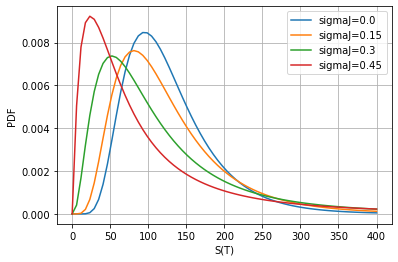

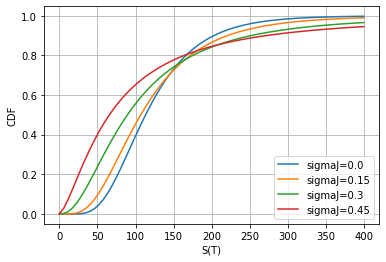

In [6]:
mainCalculation()